In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Fuera a que pandas ,iester todas las filas y columnas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
def detectar_outliers_iqr(df, columna, factor=1.5):
    """
    Detecta outliers usando el método IQR.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame de pandas
    columna : str
        Nombre de la columna numérica
    factor : float, default=1.5
        Factor multiplicador del IQR (1.5 estándar, 3.0 más conservador)
    
    Retorna:
    --------
    dict : Diccionario con información de outliers
    """
    # Calcular Q1, Q3 e IQR
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular límites
    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR
    
    # Identificar outliers
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'limite_inferior': limite_inferior,
        'limite_superior': limite_superior,
        'n_outliers': len(outliers),
        'outliers': outliers,
        'indices_outliers': outliers.index.tolist()
    }

print("✅ Función detectar_outliers_iqr creada")

✅ Función detectar_outliers_iqr creada


In [4]:
df = pd.read_csv("housing-dataset.csv", index_col="Id")

In [5]:
df.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
571           90       RL         74.0    13101   Pave   NaN      IR1   
1259          80       RL         59.0     9587   Pave   NaN      IR1   
425           20       RL         72.0     9000   Pave   NaN      Reg   
1321          20       RL         70.0     8400   Pave   NaN      Reg   
1338          30       RM        153.0     4118   Pave  Grvl      IR1   
204          120       RM          NaN     4438   Pave   NaN      Reg   
630           80       RL         82.0     9020   Pave   NaN      Reg   
1078          20       RL          NaN    15870   Pave   NaN      IR1   
676          160       RL         24.0     2289   Pave   NaN      Reg   
1204          20       RL         75.0     9750   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
571          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1259         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
425          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1321         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1338         Bnk    AllPub    Corner       Mod      OldTown      Feedr   
204          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
630          Lvl    AllPub    Corner       Gtl        NAmes      Feedr   
1078         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
676          Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1204         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
571        Norm   Duplex     1Story            5            5       1965   
1259       Norm     1Fam       SLvl            7            5       2005   
425        Norm     1Fam     1Story            6            5       1956   
1321       Norm     1Fam     1Story            6            3       1957   
1338       Norm     1Fam     1Story            4            4       1941   
204        Norm   TwnhsE     1Story            6            5       2004   
630        Norm     1Fam       SLvl            6            5       1964   
1078       Norm     1Fam     1Story            5            5       1969   
676        Norm    Twnhs     2Story            6            6       1978   
1204       Norm     1Fam     1Story            7            5       2000   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
571           1965     Gable  CompShg     HdBoard     HdBoard    BrkFace   
1259          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
425           1956     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1321          1957       Hip  CompShg     BrkFace     BrkFace        NaN   
1338          1950     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   
204           2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   
630           1964     Gable  WdShngl     Plywood     Wd Sdng    BrkFace   
1078          1969     Gable  CompShg     VinylSd     Plywood        NaN   
676           1978     Gable  CompShg     Plywood     Brk Cmn        NaN   
1204          2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
571        108.0        TA        TA     CBlock       TA       TA   
1259       182.0        Gd        TA      PConc       Gd       TA   
425         74.0        TA        TA     CBlock       Gd       TA   
1321         0.0        TA        TA     CBlock       TA       TA   


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
aux = df.isnull().sum()
 
aux[ aux > 0 ].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
df.shape

(1460, 80)

In [9]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Variable MSSubClass

In [10]:
sorted(df["MSSubClass"].unique())

[np.int64(20),
 np.int64(30),
 np.int64(40),
 np.int64(45),
 np.int64(50),
 np.int64(60),
 np.int64(70),
 np.int64(75),
 np.int64(80),
 np.int64(85),
 np.int64(90),
 np.int64(120),
 np.int64(160),
 np.int64(180),
 np.int64(190)]

In [11]:
conv = {
    20: "1-STORY 1946 & NEWER ALL STYLES",
    30: "1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45: "1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60: "2-STORY 1946 & NEWER",
    70: "2-STORY 1945 & OLDER",
    75: "2-1/2 STORY ALL AGES",
    80: "SPLIT OR MULTI-LEVEL",
    85: "SPLIT FOYER",
    90: "DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

df["MSSubClass"] = df["MSSubClass"].replace(conv)


In [12]:
df.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street  \
Id                                                                            
1285    1-1/2 STORY FINISHED ALL AGES       RL         50.0     9638   Pave   
1212    1-1/2 STORY FINISHED ALL AGES       RL        152.0    12134   Pave   
1459  1-STORY 1946 & NEWER ALL STYLES       RL         68.0     9717   Pave   
1088             2-STORY 1946 & NEWER       FV         85.0    10574   Pave   
1403  1-STORY 1946 & NEWER ALL STYLES       RL         64.0     6762   Pave   
696   1-STORY 1946 & NEWER ALL STYLES       RL         54.0    13811   Pave   
1457  1-STORY 1946 & NEWER ALL STYLES       RL         85.0    13175   Pave   
834   1-STORY 1946 & NEWER ALL STYLES       RL        100.0    10004   Pave   
92    1-STORY 1946 & NEWER ALL STYLES       RL         85.0     8500   Pave   
766   1-STORY 1946 & NEWER ALL STYLES       RL         75.0    14587   Pave   

     Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
Id                                                                           
1285   NaN      Reg         Lvl    AllPub    Inside       Gtl        SWISU   
1212   NaN      IR1         Bnk    AllPub    Inside       Mod      Gilbert   
1459   NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
1088   NaN      Reg         Lvl    AllPub    Inside       Gtl      Somerst   
1403   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
696    NaN      IR1         Lvl    AllPub    Inside       Gtl       Timber   
1457   NaN      Reg         Lvl    AllPub    Inside       Gtl       NWAmes   
834    NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
92     NaN      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
766    NaN      IR1         Lvl    AllPub    Inside       Gtl      Somerst   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
Id                                                                         
1285      Feedr       Norm     1Fam     1.5Fin            6            7   
1212       Norm       Norm     1Fam     1.5Fin            8            7   
1459       Norm       Norm     1Fam     1Story            5            6   
1088       Norm       Norm     1Fam     2Story            8            5   
1403       Norm       Norm     1Fam     1Story            7            5   
696        Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     1Story            6            6   
834        Norm       Norm     1Fam     1Story            6            6   
92         Norm       Norm     1Fam     1Story            5            3   
766        Norm       Norm     1Fam     1Story            9            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
Id                                                                         
1285       1919          1990     Gable  CompShg     Wd Sdng     Wd Shng   
1212       1988          2005     Gable  CompShg     Wd Sdng     Wd Sdng   
1459       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1088       2005          2006     Gable  CompShg     VinylSd     VinylSd   
1403       2006          2006     Gable  CompShg     VinylSd     VinylSd   
696        1987          1987     Gable  CompShg     HdBoard     HdBoard   
1457       1978          1988     Gable  CompShg     Plywood     Plywood   
834        1964          1964     Gable  CompShg     HdBoard     Plywood   
92         1961          1961       Hip  CompShg     HdBoard     HdBoard   
766        2008          2008     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                             
1285        NaN         0.0        TA        TA      PConc       TA       TA   
1212        NaN         0.0        Gd        TA       Wood       Gd       T

In [13]:
df["MSSubClass"].unique()

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

In [14]:
df["MSSubClass"].value_counts()

MSSubClass
1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: count, dtype: int64

<Axes: xlabel='MSSubClass'>

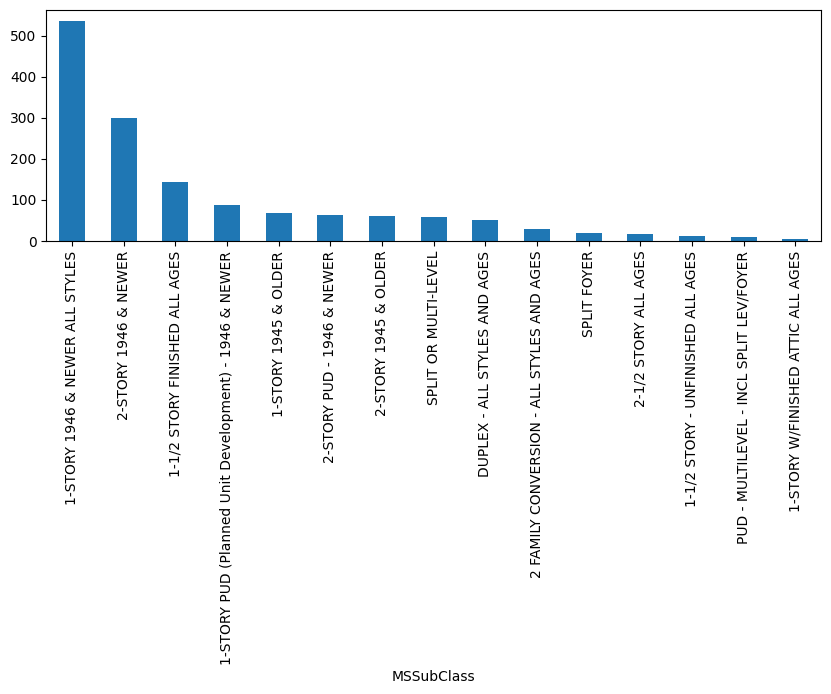

In [15]:
plt.figure(figsize=(10, 3))
df["MSSubClass"].value_counts().plot(kind = "bar")

## MSZoning

In [16]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [17]:
df_aux = df.copy()
df_aux["Precio medio por unidad area"] = df_aux["SalePrice"] / df_aux["GrLivArea"]
df_aux.groupby("MSZoning")["Precio medio por unidad area"].mean().sort_values(ascending=False)

MSZoning
FV         136.280240
RL         124.293310
RM         100.666579
RH          95.734775
C (all)     63.951611
Name: Precio medio por unidad area, dtype: float64

In [18]:
conv = {"C (all)" : 1,
        "RH" :  2,
        "RM": 3,
        "RL" : 4,
        "FV" : 5}

df["MSZoning"] = df["MSZoning"].replace(conv)
df["MSZoning"].value_counts()

C:\Users\Brayan\AppData\Local\Temp\ipykernel_3404\69488279.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MSZoning"] = df["MSZoning"].replace(conv)


MSZoning
4    1151
3     218
5      65
2      16
1      10
Name: count, dtype: int64

<Axes: xlabel='MSZoning'>

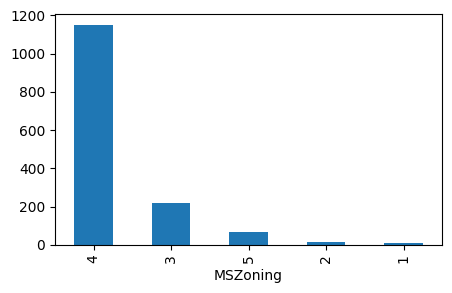

In [19]:
plt.figure(figsize=(5, 3))
df["MSZoning"].value_counts().plot(kind = "bar")

## LotFrontage

In [20]:
df["LotFrontage"].isna().sum()

np.int64(259)

In [21]:
df.shape

(1460, 80)

In [22]:
df[ df["LotFrontage"].isna() ]["MSZoning"].value_counts()

MSZoning
4    229
3     19
5      8
2      3
Name: count, dtype: int64

In [23]:
# Suponemos que si es missing es que no da a la calle
df.loc[ df["LotFrontage"].isna(), "LotFrontage" ] = 0

In [24]:
df["LotFrontage"].isna().sum()

np.int64(0)

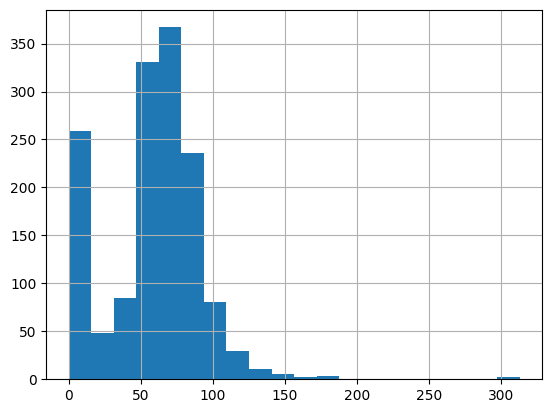

In [25]:
plt.Figure(figsize=(5,3))
df["LotFrontage"].hist(bins=20);

<Axes: xlabel='LotFrontage', ylabel='Count'>

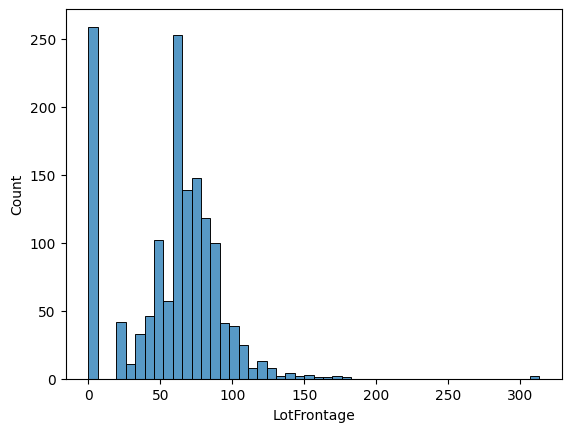

In [26]:
plt.Figure(figsize=(5,3))
sns.histplot(df["LotFrontage"])

C:\Users\Brayan\AppData\Local\Temp\ipykernel_3404\847385069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["LotFrontage"], rug=True)


<Axes: xlabel='LotFrontage', ylabel='Density'>

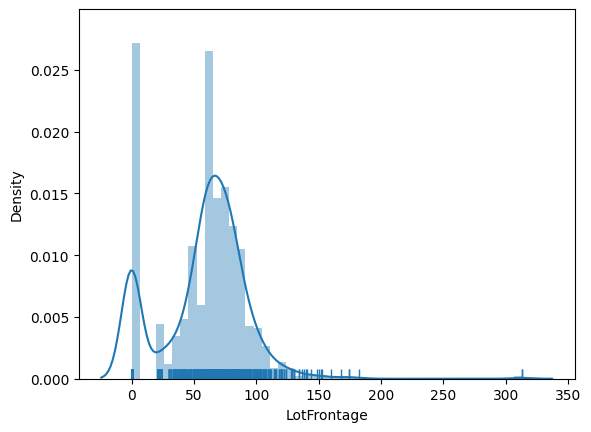

In [27]:
plt.Figure(figsize=(5,3))
sns.distplot(df["LotFrontage"], rug=True)

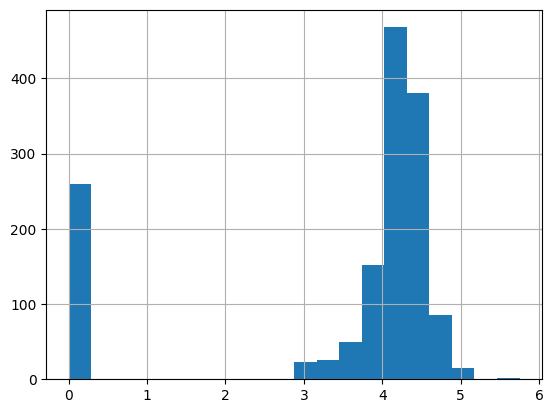

In [28]:
plt.Figure(figsize=(5,3))
df["LotFrontage"].apply(np.log1p).hist(bins=20);

In [29]:
df["LotFrontage"] = df["LotFrontage"].apply(np.log1p)

## LotArea

In [30]:
df["LotArea"].isna().sum()

np.int64(0)

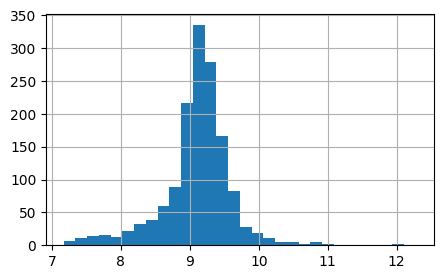

In [31]:
plt.figure(figsize=(5,3))
df["LotArea"].apply(np.log).hist(bins=30);

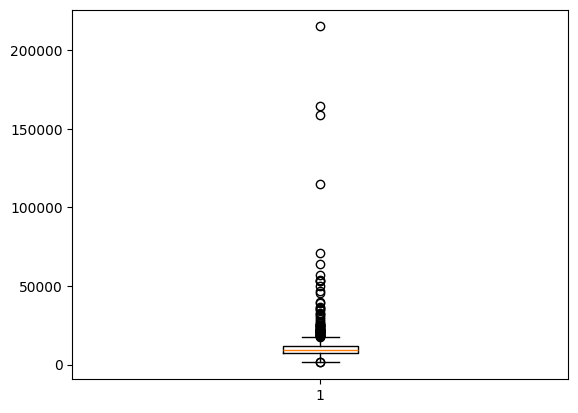

In [32]:
plt.boxplot(df["LotArea"]);

In [33]:
detectar_outliers_iqr(df, "LotArea")

{'Q1': np.float64(7553.5),
 'Q3': np.float64(11601.5),
 'IQR': np.float64(4048.0),
 'limite_inferior': np.float64(1481.5),
 'limite_superior': np.float64(17673.5),
 'n_outliers': 69,
 'outliers':                                      MSSubClass  MSZoning  LotFrontage  \
 Id                                                                       
 54              1-STORY 1946 & NEWER ALL STYLES         4     4.234107   
 67              1-STORY 1946 & NEWER ALL STYLES         4     0.000000   
 114             1-STORY 1946 & NEWER ALL STYLES         4     0.000000   
 121                        SPLIT OR MULTI-LEVEL         4     0.000000   
 160                        2-STORY 1946 & NEWER         4     4.905275   
 172             1-STORY 1946 & NEWER ALL STYLES         4     4.955827   
 186                        2-1/2 STORY ALL AGES         3     4.510860   
 198                        2-1/2 STORY ALL AGES         4     5.164786   
 250               1-1/2 STORY FINISHED ALL AGES       

In [34]:
df["LotArea"] = df["LotArea"].apply(np.log10)
detectar_outliers_iqr(df, "LotArea")

{'Q1': np.float64(3.8781480021531904),
 'Q3': np.float64(4.064514133477316),
 'IQR': np.float64(0.18636613132412583),
 'limite_inferior': np.float64(3.5985988051670015),
 'limite_superior': np.float64(4.344063330463505),
 'n_outliers': 132,
 'outliers':                                              MSSubClass  MSZoning  \
 Id                                                                  
 54                      1-STORY 1946 & NEWER ALL STYLES         4   
 57                           2-STORY PUD - 1946 & NEWER         5   
 76              PUD - MULTILEVEL - INCL SPLIT LEV/FOYER         3   
 88                           2-STORY PUD - 1946 & NEWER         5   
 116                          2-STORY PUD - 1946 & NEWER         5   
 146                          2-STORY PUD - 1946 & NEWER         3   
 172                     1-STORY 1946 & NEWER ALL STYLES         4   
 181                          2-STORY PUD - 1946 & NEWER         5   
 186                                2-1/2 STORY

In [35]:
(df["LotArea"] > 5).sum()

np.int64(4)

## Variable objeto (SalePrice)

In [36]:
df["SalePrice"].isna().sum()

np.int64(0)

In [37]:
df["SalePrice"].dtype

dtype('int64')

<Axes: >

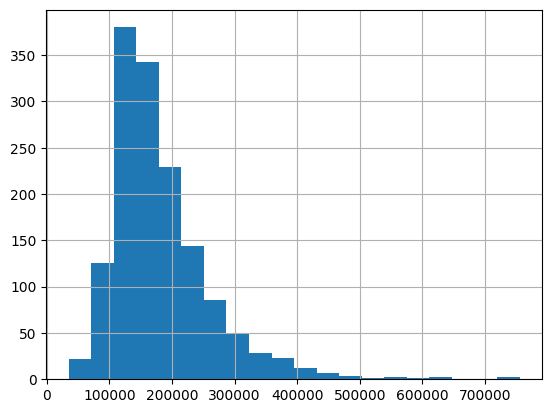

In [38]:
plt.Figure(figsize=(7,3))
df["SalePrice"].hist(bins=20)

<Axes: >

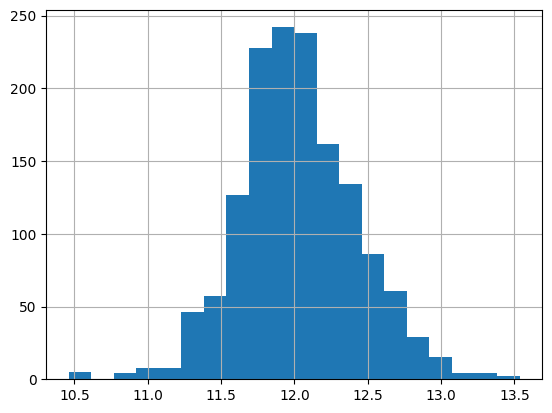

In [39]:
plt.Figure(figsize=(7,3))
df["SalePrice"].apply(np.log).hist(bins=20)

In [40]:
df["SalePrice"] = df["SalePrice"].apply(np.log)

In [43]:
# Ver la correlacion entre las distintas variables
corrs = df.corr(numeric_only = True)

<Axes: >

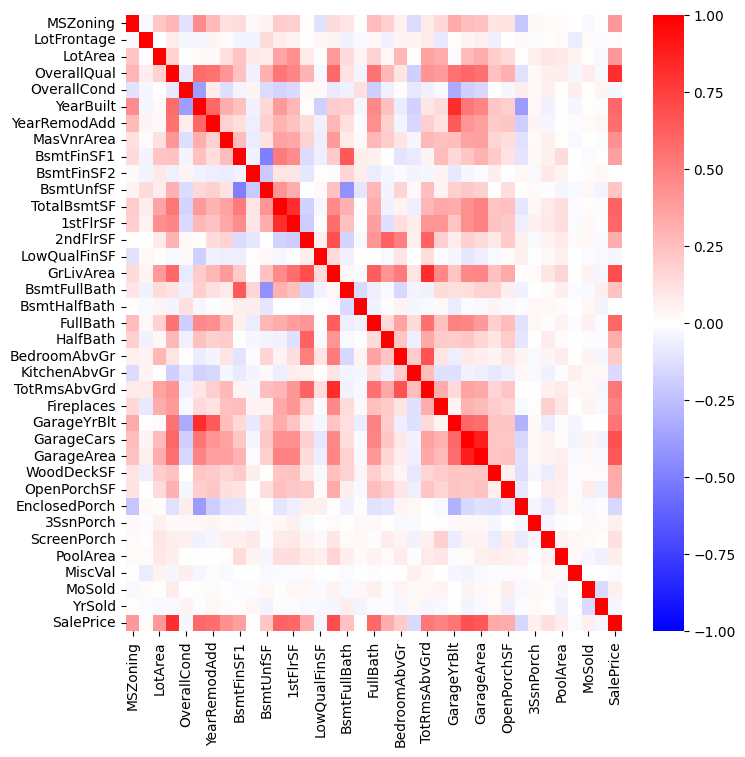

In [47]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrs, cmap="bwr", vmin=-1)

<Figure size 800x800 with 0 Axes>

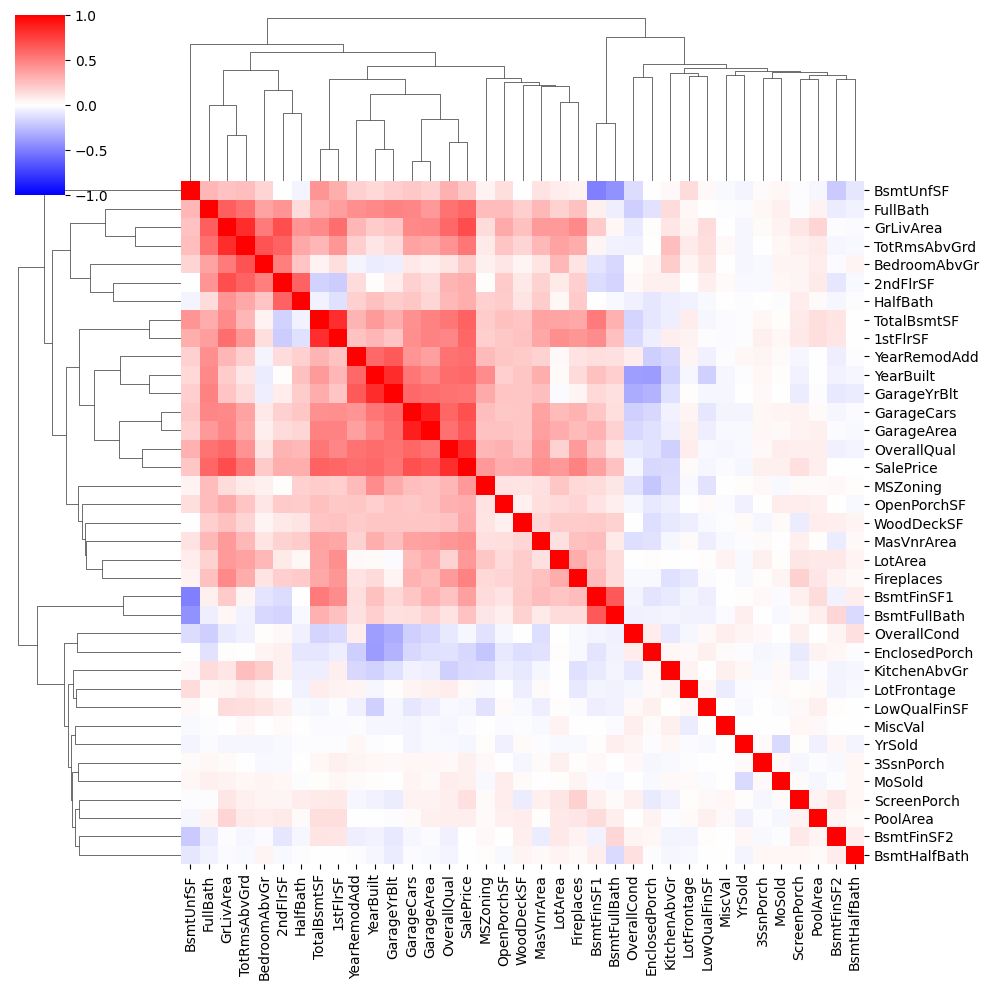

In [ ]:
plt.figure(figsize=(8, 8))
sns.clustermap(corrs, cmap="bwr", vmin=-1);

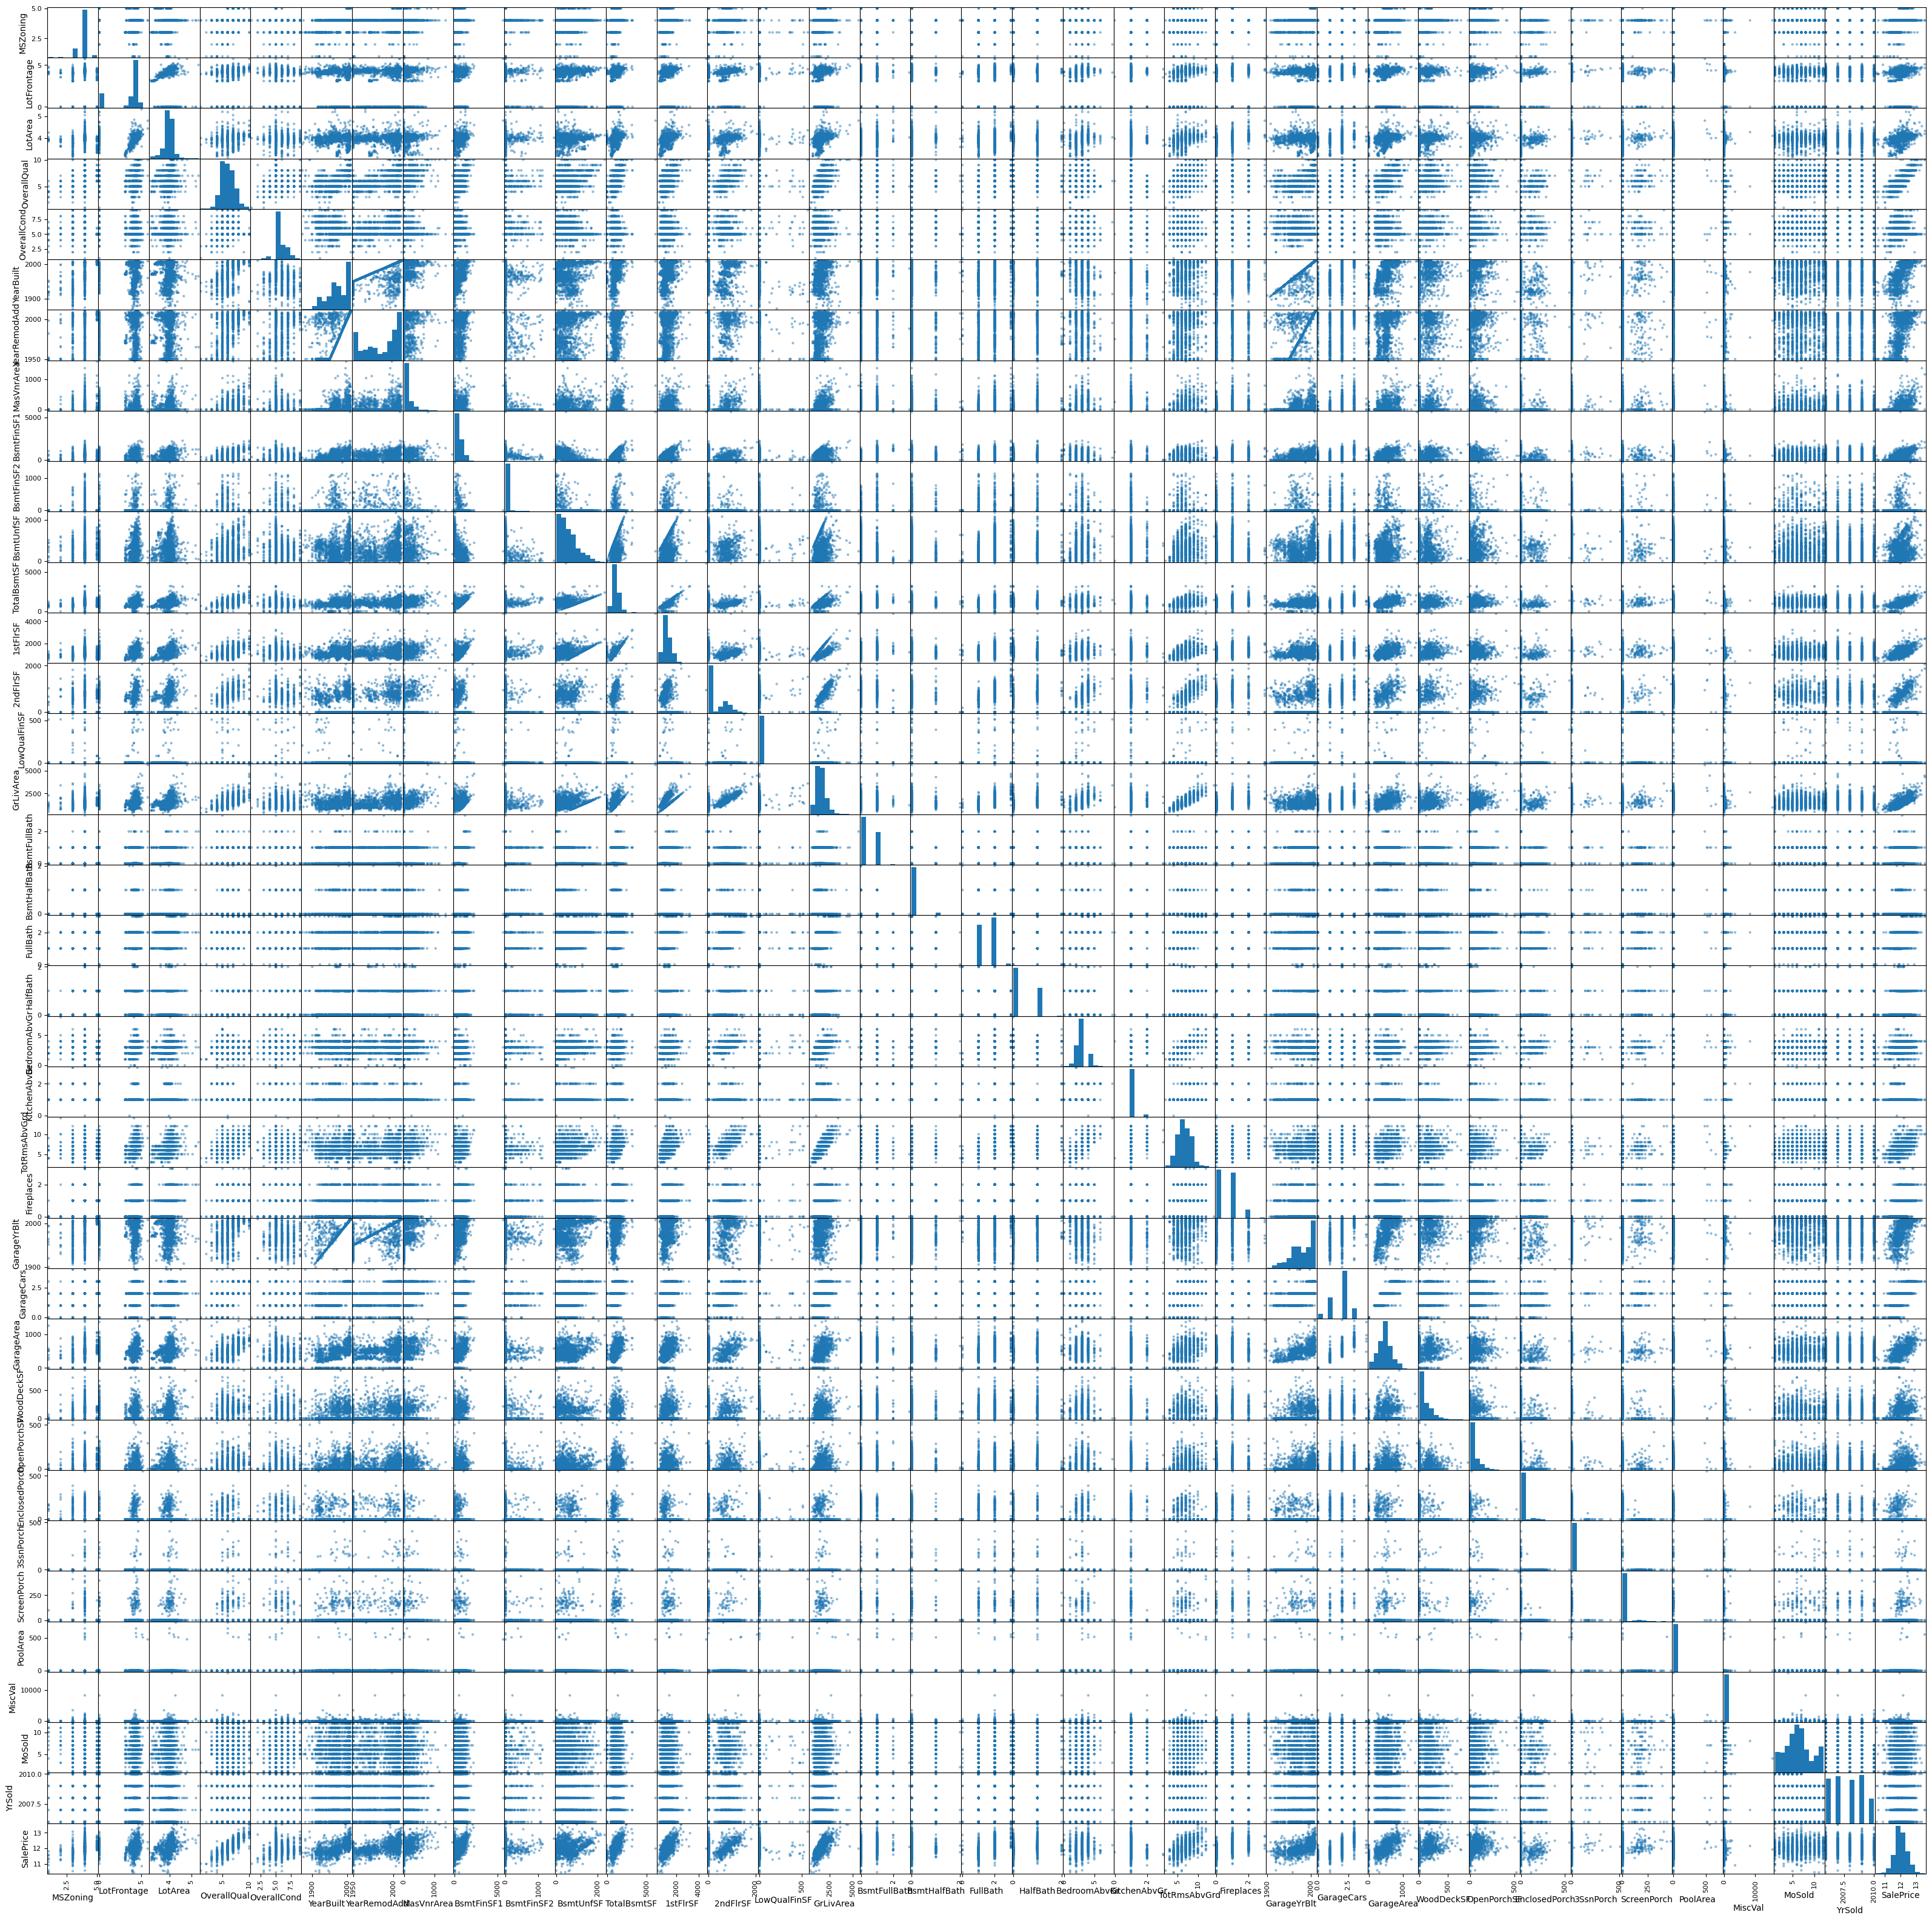

In [53]:
pd.plotting.scatter_matrix(df, figsize=(40,40));

## Neighborhood

In [54]:
df["Neighborhood"].isna().sum()

np.int64(0)

In [55]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

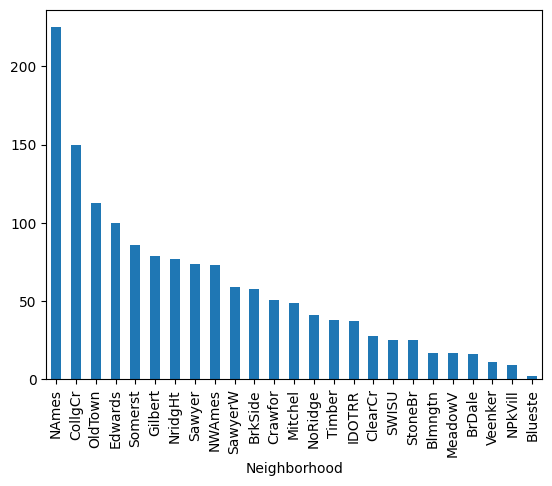

In [56]:
# Blueste tendriamos q fucionarlo con otro barrio colindate, ya q casi no hay datos
df["Neighborhood"].value_counts().plot(kind="bar");

<Axes: xlabel='Neighborhood'>

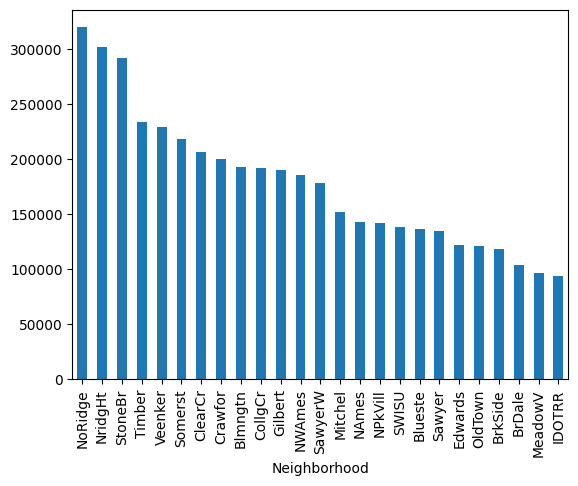

In [60]:
np.exp(df.groupby("Neighborhood")["SalePrice"].mean()).sort_values(ascending=False).plot(kind="bar")

La dejamos como categorica, asi al hacer get_dummies se me convierte en numerica

## Overall quality

In [61]:
df["OverallQual"].isna().sum()

np.int64(0)

In [63]:
sorted(df["OverallQual"].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

<Axes: xlabel='OverallQual'>

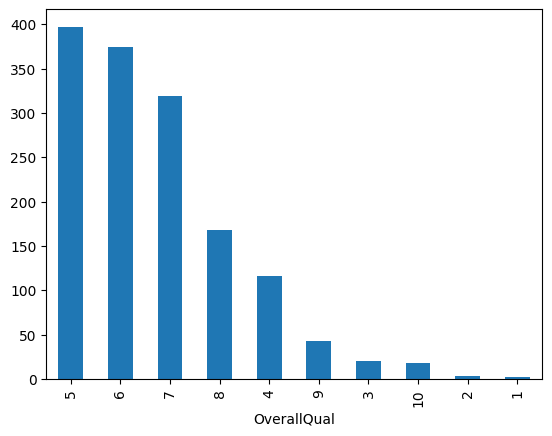

In [64]:
df["OverallQual"].value_counts().plot(kind="bar")

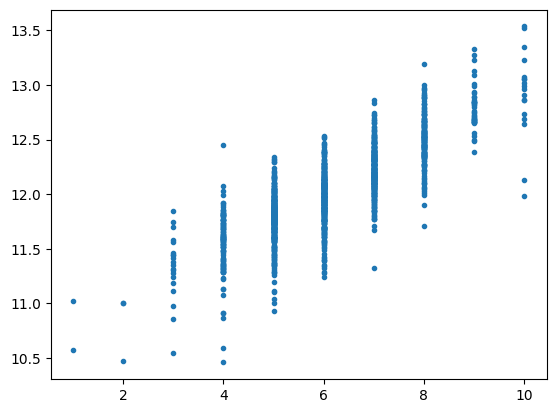

In [66]:
plt.plot(df["OverallQual"], df["SalePrice"], ".")

## Creo modelo basico

In [67]:
cols = ["MSSubClass", "MSZoning", "LotFrontage", "LotArea", "SalePrice", "Neighborhood", "OverallQual"]
df = df[cols]

In [68]:
df.head(3)

MSSubClass  MSZoning  LotFrontage   LotArea  \
Id                                                                     
1              2-STORY 1946 & NEWER         4     4.189655  3.926857   
2   1-STORY 1946 & NEWER ALL STYLES         4     4.394449  3.982271   
3              2-STORY 1946 & NEWER         4     4.234107  4.051153   

    SalePrice Neighborhood  OverallQual  
Id                                       
1   12.247694      CollgCr            7  
2   12.109011      Veenker            6  
3   12.317167      CollgCr            7

In [69]:
df = 1*pd.get_dummies(df, drop_first=True)
df.head(3)

MSZoning  LotFrontage   LotArea  SalePrice  OverallQual  \
Id                                                            
1          4     4.189655  3.926857  12.247694            7   
2          4     4.394449  3.982271  12.109011            6   
3          4     4.234107  4.051153  12.317167            7   

    MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
Id                                                                              
1                                          0                                0   
2                                          0                                0   
3                                          0                                0   

    MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
Id                                               
1                                            0   
2                                            1   
3                                            0   

    MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
Id                                                                     
1                                                   0                  
2                                                   0                  
3                                                   0                  

    MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
Id                                                 
1                                              0   
2                                              0   
3                                              0   

    MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
Id                                                         
1                                                   0      
2                                                   0      
3                                                   0      

    MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
Id                                                                     
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   

    MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
Id                                                                           
1                                 1                                      0   
2                                 0                                      0   
3                                 1                                      0   

    MSSubClass_DUPLEX - ALL STYLES AND AGES  \
Id                                            
1                                         0   
2                                         0   
3                                         0   

    MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  \
Id                                                       
1                                                   0    
2                                                   0    
3                                                   0    

    MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  \
Id                                                            
1                        0                                0   
2                        0                                0   
3                        0                                0   

    Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
Id                                                                    
1                      0                    0                     0   
2                      0                    0                     0   
3                      0                    0                     0   

    Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
Id                                                                     
1            

In [70]:
df.shape

(1460, 43)

In [71]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)
df_train.head(3)

MSZoning  LotFrontage   LotArea  SalePrice  OverallQual  \
Id                                                             
633         4     4.454347  4.075547  11.320554            7   
209         4     0.000000  4.157275  12.531773            7   
84          4     4.394449  3.948999  11.747998            5   

     MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
Id                                              
633                                         0   
209                                         0   
84                                          0   

     MSSubClass_1-STORY 1945 & OLDER  \
Id                                     
633                                0   
209                                0   
84                                 0   

     MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
Id                                                
633                                           1   
209                                           0   
84                                            1   

     MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
Id                                                                      
633                                                  0                  
209                                                  0                  
84                                                   0                  

     MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
Id                                                  
633                                             0   
209                                             0   
84                                              0   

     MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
Id                                                          
633                                                  0      
209                                                  0      
84                                                   0      

     MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
Id                                                                      
633                                0                                0   
209                                0                                0   
84                                 0                                0   

     MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
Id                                                                            
633                                0                                      0   
209                                1                                      0   
84                                 0                                      0   

     MSSubClass_DUPLEX - ALL STYLES AND AGES  \
Id                                             
633                                        0   
209                                        0   
84                                         0   

     MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  \
Id                                                        
633                                                  0    
209                                                  0    
84                                                   0    

     MSSubClass_SPLIT FOYER  MSSubClass_SPLIT OR MULTI-LEVEL  \
Id                                                             
633                       0                                0   
209                       0                                0   
84                        0                                0   

     Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
Id                                                                     
633                     0                    0                     0   
209                     0                    0                     0   
84                      0                    0                     0   

     Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_

In [72]:
df_train.head()

MSZoning  LotFrontage   LotArea  SalePrice  OverallQual  \
Id                                                              
633          4     4.454347  4.075547  11.320554            7   
209          4     0.000000  4.157275  12.531773            7   
84           4     4.394449  3.948999  11.747998            5   
1175         4     4.394449  4.219060  12.384219            6   
251          4     4.025352  3.728354  11.245046            3   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
Id                                               
633                                          0   
209                                          0   
84                                           0   
1175                                         0   
251                                          0   

      MSSubClass_1-STORY 1945 & OLDER  \
Id                                      
633                                 0   
209                                 0   
84                                  0   
1175                                0   
251                                 1   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
Id                                                 
633                                            1   
209                                            0   
84                                             1   
1175                                           0   
251                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
Id                                                                       
633                                                   0                  
209                                                   0                  
84                                                    0                  
1175                                                  0                  
251                                                   0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
Id                                                   
633                                              0   
209                                              0   
84                                               0   
1175                                             0   
251                                              0   

      MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
Id                                                           
633                                                   0      
209                                                   0      
84                                                    0      
1175                                                  0      
251                                                   0      

      MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
Id                                                                       
633                                 0                                0   
209                                 0                                0   
84                                  0                                0   
1175                                0                                1   
251                                 0                                0   

      MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
Id                                                                             
633                                 0                                      0   
209                                 1                                      0   
84                                  0                                      0   
1175                                0                                      0   
251                                 0                                      0   

      MSSubClass_DUPLEX - ALL STYLES AND AGES  \
Id                                              
633                                

In [73]:
# Apuntes
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

# Examen
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]


In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # Entrenamiendo del modelo

LinearRegression()

In [75]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8056142873144766, 0.7917656705405822)

In [76]:
predicciones_train = np.exp(model.predict(X_train)).round()
predicciones_test = np.exp(model.predict(X_test)).round()
predicciones_train[:10]

array([198676., 231307., 133038., 209829.,  72262., 156764., 114473.,
       131329., 364224., 143516.])

In [77]:
reales_train = np.exp(y_train.values)
reales_test = np.exp(y_test.values)
reales_test[:10]

array([231500., 179500., 122000.,  84500., 142000., 325624., 285000.,
       151000., 195000., 275000.])

In [78]:
maximo = max(max(predicciones_train), max(predicciones_test), max(reales_train), max(reales_test))
maximo

np.float64(754999.9999999999)

(0.0, 754999.9999999999)

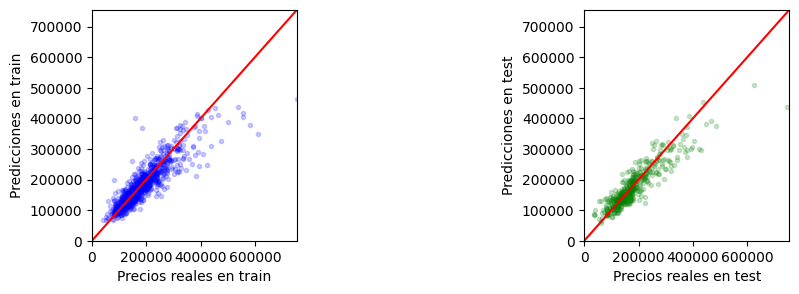

In [79]:
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1) # filas, columnas, subfigura a pintar
plt.plot(reales_train, predicciones_train, ".b", alpha=0.2)
plt.xlabel("Precios reales en train")
plt.ylabel("Predicciones en train")
plt.plot([0, maximo], [0,maximo], "r")
plt.xlim([0, maximo])
plt.ylim([0, maximo])

plt.subplot(1, 3, 3) # filas, columnas, subfigura a pintar
plt.plot(reales_test, predicciones_test, ".g", alpha=0.2)
plt.xlabel("Precios reales en test")
plt.ylabel("Predicciones en test")
plt.plot([0, maximo], [0,maximo], "r")
plt.xlim([0, maximo])
plt.ylim([0, maximo])